1  (a) 

In [1]:
import numpy as np
from numpy import exp

import matplotlib.pyplot as plt
from scipy.integrate import odeint

Text(0, 0.5, 'Growth (in %)')

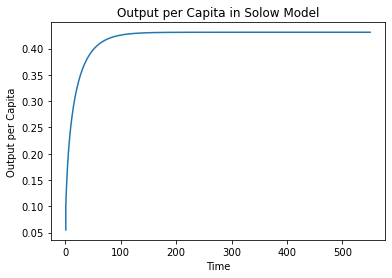

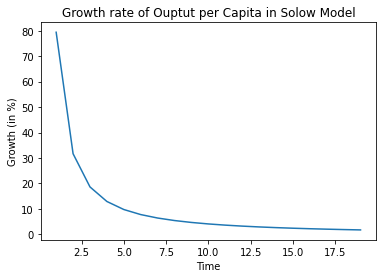

In [2]:
# Production function, Y = K^alpha*(hL)^(1-alpha) 
# K_t = s* (K_t-1)^(alpha) (hL)^(1-alpha) + (1-delta)*K_t
# Output per Capita, y = Y/pop_size
# K_0 = 9e5
# t = 0,1,2,....550
# h = 8/24 = 1/3
# growth[t] is the growth rate of output per capita

alpha = 0.3
s = 0.3
delta = 0.05
L = 1.98e8
h = 1/3
pop_size = 3.3e8
K = [0]*551 # listing the total length of K vector
time = [1]*551
K[0] = 9e5
y = [0]*551
growth= [0]*551
y[0] = (K[0]**alpha*(h*L)**(1-alpha))/pop_size

for t in range(1,551):
    time[t] = t
    K[t] = s*K[t-1]**alpha*(h*L)**(1-alpha) + (1-delta)*K[t-1]
    y[t] = (K[t]**alpha*(h*L)**(1-alpha))/pop_size
    growth[t] = (y[t]/y[t-1]-1)*100


plt.figure()
plt.plot(time, y)
plt.title("Output per Capita in Solow Model")
plt.xlabel("Time")
plt.ylabel("Output per Capita")

plt.figure()
chk = 20
plt.plot(time[1:chk], growth[1:chk])
plt.title("Growth rate of Ouptut per Capita in Solow Model")
plt.xlabel("Time")
plt.ylabel("Growth (in %)")

1 (b)

In [3]:
gamma = 1/18
sigma = 1/5.2

In [4]:
def F(x, t, R0 = 2):
    
    s, e, i = x
    
    β = R0 * gamma 
    ne = β * s * i

    # Time derivatives
    ds = - ne
    de = ne - sigma * e
    di = sigma * e - gamma * i

    return ds, de, di

In [5]:
# initial conditions of s, e, i
i_0 = 1e-7
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0

x_0 = s_0, e_0, i_0
print(x_0)


# time
t_length = 1000
grid_size = 1001
t_vec = np.linspace(0, t_length, grid_size)

(0.9999995, 4e-07, 1e-07)


In [6]:
def solve_path(t_vec, x_init=x_0):
    s_path, e_path, i_path = odeint(F, x_init, t_vec).transpose()
    return s_path, e_path, i_path

s_path, e_path, i_path = solve_path(t_vec)
c_path = 1 - s_path - e_path


for i in range(0, len(c_path)):
    if c_path[i] > 0.5:
        print(i)
        break


386


50% of the pop_size was infected by 386th day since the start of Covid-19

1 (c) 

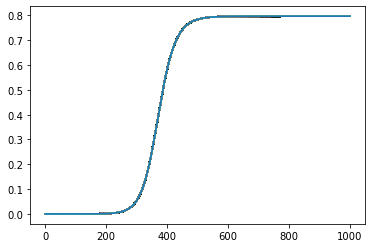

In [7]:
a = odeint(F, x_0, t_vec,)

fig, ax = plt.subplots()

for path in zip(c_path):
    ax.plot(t_vec, c_path)



plt.show()

In [8]:
print(i_path[800])
print(s_path[800])
print(e_path[800])

2.331381110401536e-06
0.20318950455991086
3.20860215410483e-07


I chose value 800 becuase in the graph, the effect of Covid-19 is over by 800th day and the required values become constant at this point. According to the above values of i_path, s_path & e_path on 800th day, no. of infected people are 0 (given value is very close to 0), no. of susceptible people are 0.203 and no, of exposed people are 0 (given value is very close to 0).

1 (d)

Text(0, 0.5, 'Growth (in %)')

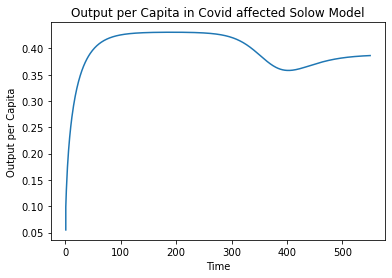

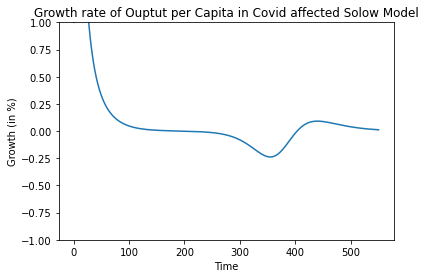

In [9]:
# Output per Capita in Covid affected model is y1
# K1[0] = K[0]
# growth1[t] is the growth rate of output per capita in Covid affected model without lockdown

r_path = 1-s_path-e_path-i_path
K1 = [1]*551
y1 = [1]*551 
K1[0] = K[0]
y1[0] = (K1[0]**(alpha)*(h*L)**(1-alpha))/pop_size
growth1 = [1]*551

for t in range (1,551):
    time[t] = t
    K1[t] = s*K1[t-1]**alpha*(((8/24)*s_path[t]+(6/24)*e_path[t]+(7/24)*r_path[t])*L)**(1-alpha)+(1-delta)*K1[t-1]
    y1[t] = (K1[t]**alpha*(((8/24)*s_path[t]+(6/24)*e_path[t]+(7/24)*r_path[t])*L)**(1-alpha))/pop_size  
    growth1[t] = (y1[t]/y1[t-1]-1)*100


plt.figure()
plt.plot(time, y1)
plt.title("Output per Capita in Covid affected Solow Model")
plt.xlabel("Time")
plt.ylabel("Output per Capita")


plt.figure()
plt.plot(time, growth1)
plt.title("Growth rate of Ouptut per Capita in Covid affected Solow Model")
plt.xlabel("Time")
plt.ylim([-1,1])
plt.ylabel("Growth (in %)")


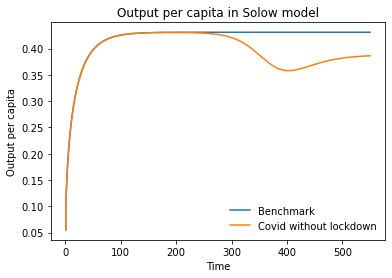

In [10]:
plt.figure()
plt.plot(time,y, label = "Benchmark")
plt.plot(time,y1, label = "Covid without lockdown")
plt.xlabel("Time")
plt.ylabel("Output per capita")
plt.title("Output per capita in Solow model")
plt.legend(frameon =False)


plt.show()


In [11]:
#C[i] is the contraction      

C = [200]*(len(y1))
Con_min= 0
for i in range (200,len(y1)):
    C[i] = y1[i] - y1[i-1]
    if C[i] < Con_min:
        Con_min = C[i]
        date = i
        
print('%dth day'%date)
print (C[date])

353th day
-0.0009179785996599743


The contraction of output per capita the largest on  353th day from the start of the pandemic and it has a value of -0.0009179785996599743

1. During the start of the Covid-19 pandemic, the output per capita in the covid affected economy is almost equal to the output per capita in benchmark economy.

2. But after 200 days, fall in output per capita in the covid affected economy is observed. This is because the labour participation falls due to absence of the infected people in the labour force and reduced working hours of recovered and exposed people. 

3. The most difficult days for the economy are during this stretch as the spread of covid is on a rise and the rate of new cases increase day by day. Output per capita in the economy keeps falling until the peak of Covid is achieved. 

4. The output per capita starts rising once the peak of covid infections has passed and the people who are recovered start coming back to work. 

5. When the GDP per capita has stabilised in the long run, a gap between the level in benchmark economy and the covid economy is observed and the covid economy has a lower level of GDP per capita. This is owing to the fact that the recovered people have a reduced working capacity of 7 hours per day, compared to 8 working hours they could have worked had they not been infected.

6. The most easy days are seen after the pandemic is over because the  economy has survived the worst all the infected people have recovered (there are no deathsin this model).

1 (e)

In [12]:
def F1(x, t, R0=2):

    s, e, i = x
    
    if (t <= 30):
        R0 = 0.5
        
    β = R0(t) * gamma if callable(R0) else R0 * gamma
    ne = β * s * i
    
     
    # Time derivatives
    ds = - ne  
    de = ne - sigma * e 
    di = sigma * e - gamma * i 
    return ds, de, di

def solve_path1(t_vec, x_init=x_0):
    s1_path, e1_path, i1_path = odeint(F1, x_init, t_vec).transpose()
    return s1_path, e1_path, i1_path

s1_path, e1_path, i1_path = solve_path1(t_vec)
c1_path = 1 - s1_path- e1_path

for i in range(0, len(c1_path)):
    if c1_path[i] > 0.5:
        print(i)
        break


430


50% of the pop_size was infected by 430th day since the start of Covid-19

<ipython-input-13-a426f968125a>:32: RuntimeWarning: invalid value encountered in double_scalars
  growth2[t] = (y2[t]/y2[t-1]-1)*100
<ipython-input-13-a426f968125a>:40: RuntimeWarning: divide by zero encountered in double_scalars
  growth2[t] = (y2[t]/y2[t-1]-1)*100


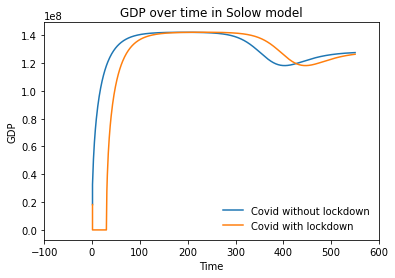

In [13]:
# Output per Capita in Covid affected model with lockdown is y2
# Output in Covid economy without lockdown is Y1
# Output in Covid economy with lockdown is Y2
# K2[0] = K[0]
# growth2[t] is the growth rate of output per capita in Covid affected model with lockdown


r1_path=1-s1_path-e1_path-i1_path

K2 = [0]*551
K2[0]=K[0]
y2 = [1]*551
y2[0]=(K2[0]**(alpha)*(h*L)**(1-alpha))/pop_size
growth2=[1]*551


Y1=[0]*551
Y1[0]=y1[0]*pop_size

Y2=[0]*551
Y2[0]=y2[0]*pop_size


for t in range (1,551):
    time[t] = t
    Y1[t]=y1[t]*pop_size
    
    if time[t] <= 30:
        K2[t] = s*K2[t-1]**alpha*((0*s1_path[t]+0*e1_path[t]+0*r1_path[t])*L)**(1-alpha)+(1-delta)*K2[t-1]
        y2[t] = (K2[t]**alpha*((0*s1_path[t]+0*e1_path[t]+0*r1_path[t])*L)**(1-alpha))/pop_size  
        
        growth2[t] = (y2[t]/y2[t-1]-1)*100
        Y2[t] = y2[t]*pop_size
    
        
        
    else:
        K2[t] = s*K2[t-1]**alpha*(((8/24)*s1_path[t]+(6/24)*e1_path[t]+(7/24)*r1_path[t])*L)**(1-alpha)+(1-delta)*K2[t-1]
        y2[t] = (K2[t]**alpha*(((8/24)*s1_path[t]+(6/24)*e1_path[t]+(7/24)*r1_path[t])*L)**(1-alpha))/pop_size  
        growth2[t] = (y2[t]/y2[t-1]-1)*100
        Y2[t]=y2[t]*pop_size
        
        
        
plt.figure()
plt.plot(time,Y1, label= "Covid without lockdown")
plt.plot(time,Y2, label= "Covid with lockdown")
plt.xlabel("Time")
plt.ylabel("GDP")
plt.title("GDP over time in Solow model")
plt.legend(frameon =False)
plt.xlim([-100,600])
plt.show()

# The lockdown wasn't useful becuase the GDP in the 'Covid with lockdown' economy and 'Covid without lockdown' economy are equal in the long run.